<a href="https://colab.research.google.com/github/231FA04430/Argumented-images/blob/main/argumented_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [49]:
img_path='/content/PEACOCK3.jpg'
img=load_img(img_path)


In [50]:
img_array=img_to_array(img)

In [51]:
img_array=img_array.reshape((1,)+img_array.shape)

In [52]:
datagen=ImageDataGenerator(
rescale=1./255,
rotation_range=20,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode ='nearest'
)

In [53]:
argumented_img=datagen.flow(img_array,batch_size=1)

In [54]:
# Corrected visualize_augmented_images function
def visualize_augmented_images(generator, num_images):
  fig, axes=plt.subplots(1, num_images, figsize=(20, 20))
  for i in range(num_images):
    batch=next(generator)
    aug_image =batch[0]
    axes[i].imshow(aug_image)
  plt.show()







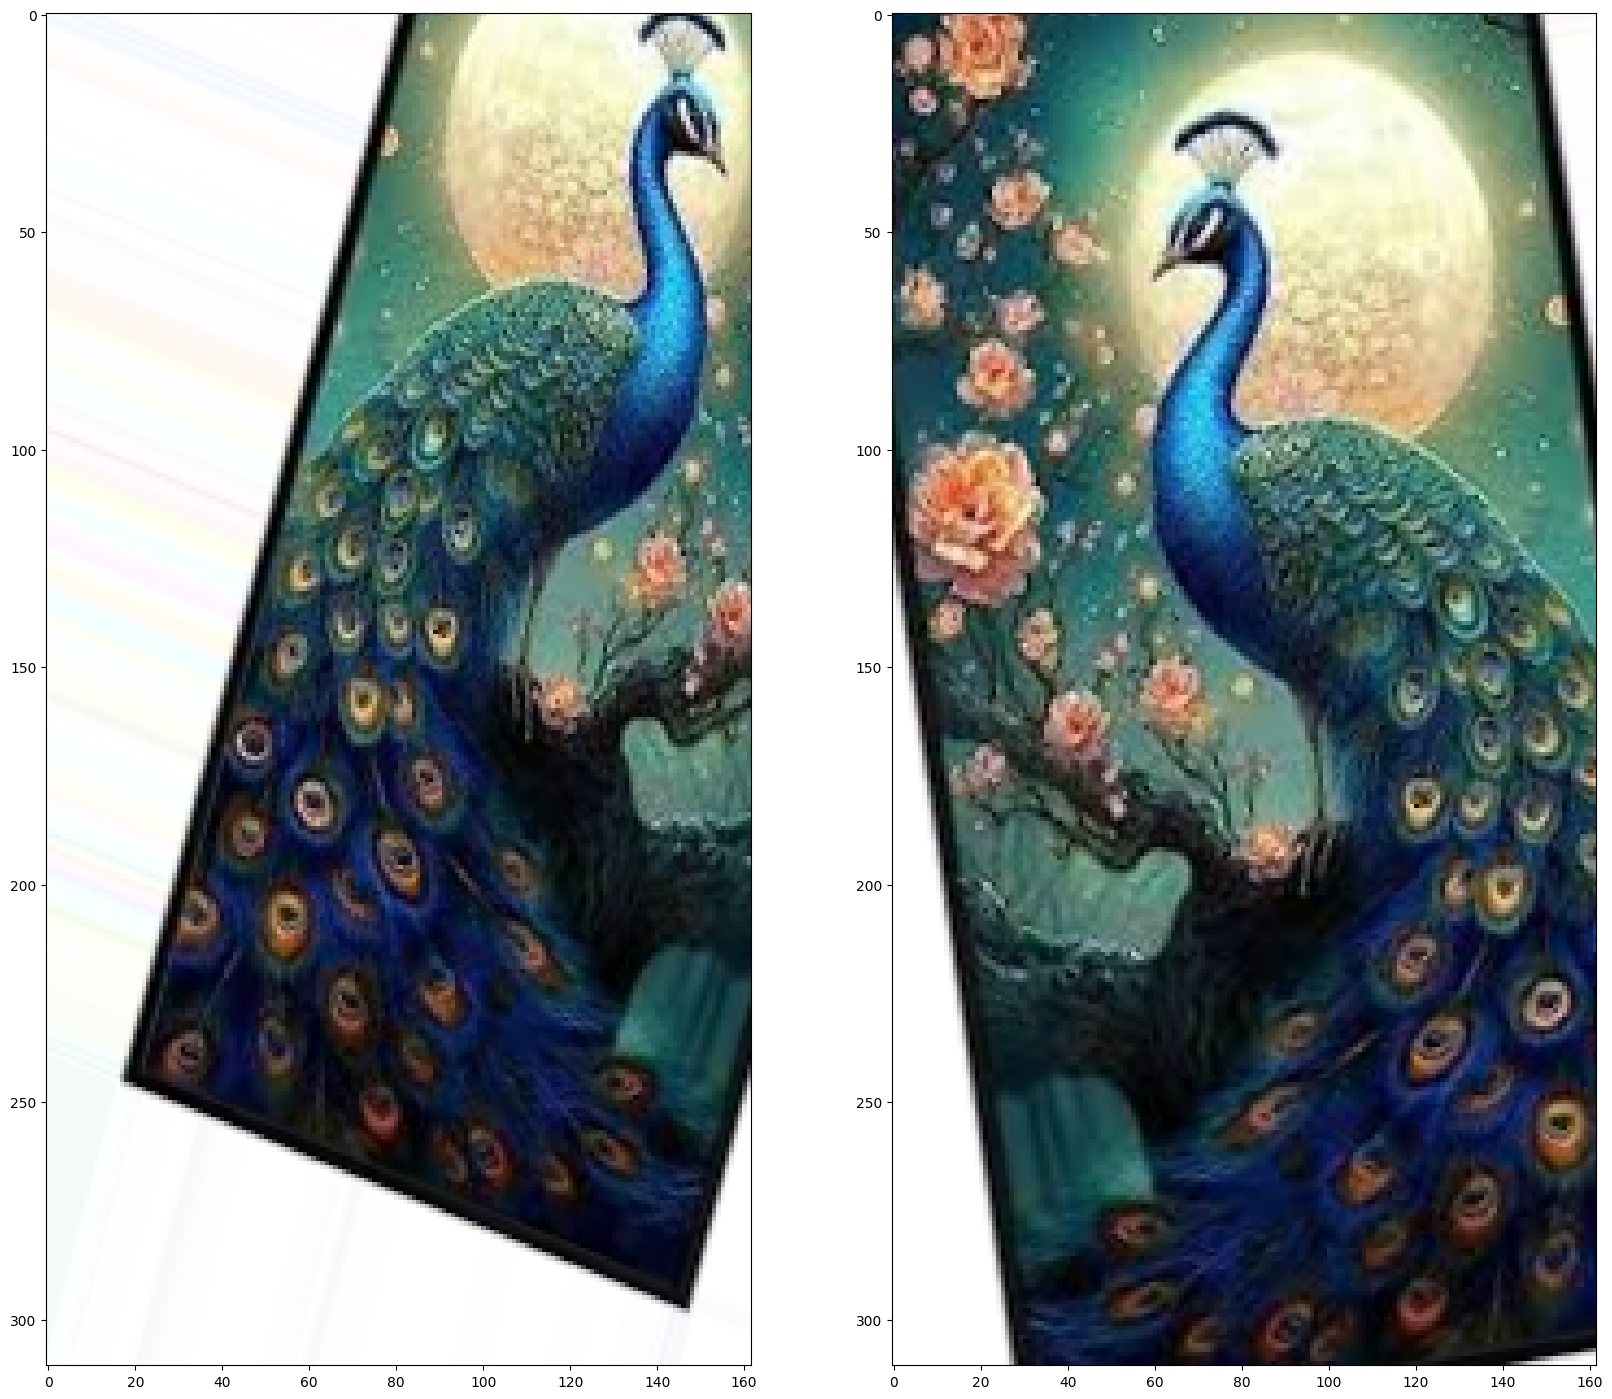

In [55]:

visualize_augmented_images(argumented_img,2)

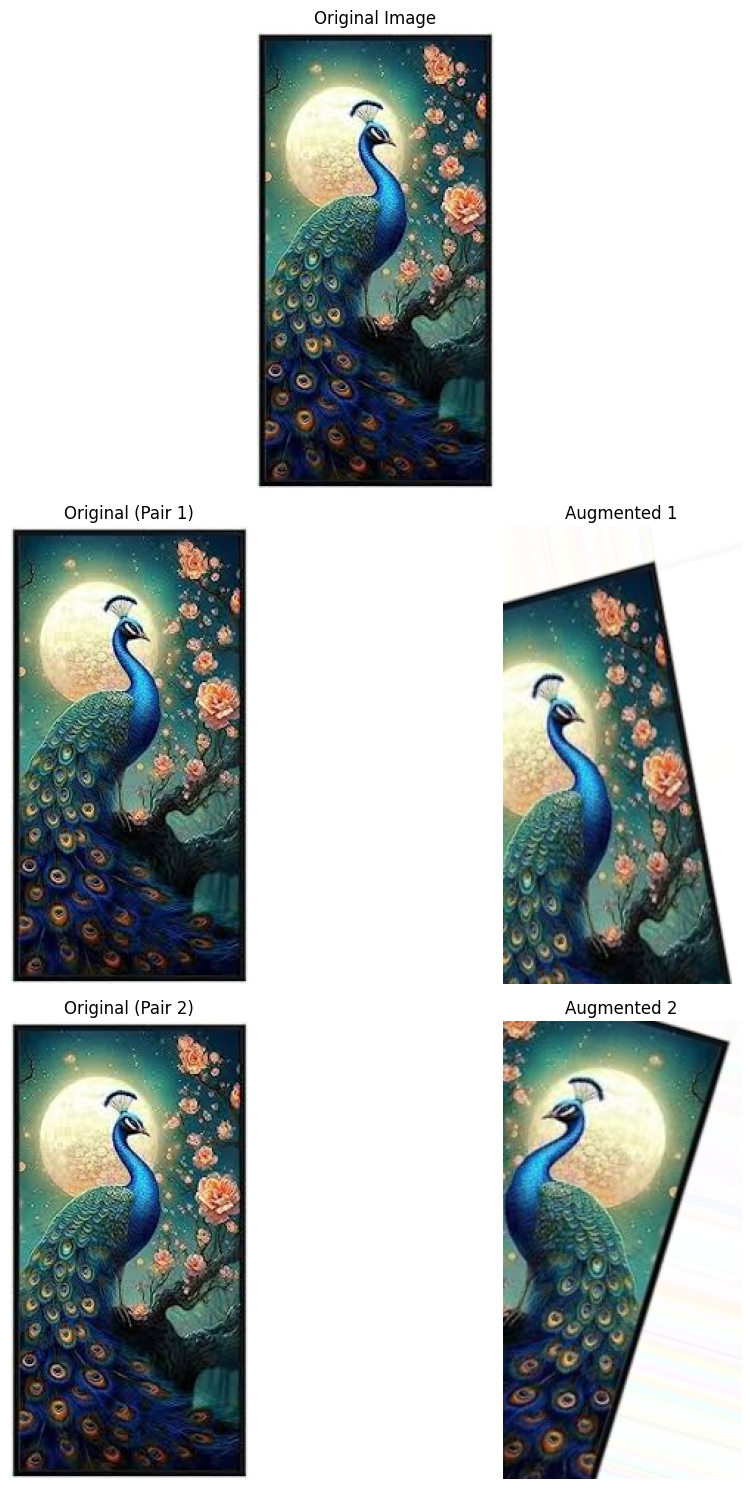

In [58]:
from IPython import get_ipython
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
img_path='/content/PEACOCK3.jpg'
img = load_img(img_path)
img_array =img_to_array(img)
img_array_expanded =img_array.reshape((1,) + img_array.shape) # Use a new variable for the expanded array
datagen=ImageDataGenerator(
rescale=1./255,
rotation_range=20,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode ='nearest'
)
augmented_image_generator = datagen.flow(img_array_expanded, batch_size=1)
def visualize_mixed_layout(original_image, augmented_image_generator, num_augmented_pairs):
    fig = plt.figure(figsize=(10, 5 * (num_augmented_pairs + 1)))
    ax0 = plt.subplot2grid((num_augmented_pairs + 1, 2), (0, 0), colspan=2)
    ax0.imshow(original_image.astype('uint8'))
    ax0.set_title("Original Image")
    ax0.axis('off')


    for i in range(num_augmented_pairs):
        ax_orig = plt.subplot2grid((num_augmented_pairs + 1, 2), (i + 1, 0))
        ax_orig.imshow(original_image.astype('uint8'))
        ax_orig.set_title(f"Original (Pair {i+1})")
        ax_orig.axis('off')
        ax_aug = plt.subplot2grid((num_augmented_pairs + 1, 2), (i + 1, 1))
        batch = next(augmented_image_generator)
        aug_image = batch[0]
        ax_aug.imshow(aug_image)
        ax_aug.set_title(f"Augmented {i+1}")
        ax_aug.axis('off')

    plt.tight_layout()
    plt.show()


visualize_mixed_layout(img_array, augmented_image_generator, 2)